Here we wiill be analyzing the PCA. We'll perform PCA on the Diabetes dataset using PCA to perform linear regression.





In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() # this dataset is already in sklearn library
# tehn we'll seperate data into dependent and independent variable
X = diabetes.data
y = diabetes.target

print(diabetes.DESCR) #This will give a description of the dataset

In [2]:
# lets split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # in this dataset the target variable y_train is a continuous variable

first we will train our model on full regression means all variable and then to less variable to see our principle component that we will find through PCA

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_full = LinearRegression()
model_full.fit(X_train, y_train)
predictions_full = model_full.predict(X_test) # we will test model on test data
mse_full = mean_squared_error(y_test, predictions_full)

print(f"MSE for the full model: {mse_full}") # this MSE will be our benchmark

MSE for the full model: 2821.750981001311


**Lets compute PCA**

In [7]:
from sklearn.decomposition import PCA

# lets perform PCA with 5 components
pca = PCA(n_components=5) # pca is the name i have given to my object and call PCA function with passing argument with number of componets i want to use

X_train_pca = pca.fit_transform(X_train) # this will take the 5 variable and fit into trainig set and store in x_train_pca
X_test_pca = pca.transform(X_test)

model_pca_5 = LinearRegression() # creating a new model model_pca_5 which is a linear regression because it only uses 5 componets to fix the data
model_pca_5.fit(X_train_pca, y_train)
predictions_pca_5 = model_pca_5.predict(X_test_pca)

mse_pca_5 = mean_squared_error(y_test, predictions_pca_5)
print(f"MSE with 4 PCA components: {mse_pca_5}") # here  have doubt , instructor said 4 but i guess we are doing with 5


MSE with 5 PCA components: 2810.79771404825


from above mean we see that we more or less same means for both all components(full model) and 5 component

In [8]:
mse_values = [] # we wil store all our mse values

# number of original features
n_features = X_train.shape[1] # 0 coponents is datapoints and shape 0 is featires components

for components in range(1, n_features):
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model_pca = LinearRegression()
    model_pca.fit(X_train_pca, y_train)
    predictions_pca = model_pca.predict(X_test_pca)

    mse_pca = mean_squared_error(y_test,predictions_pca)
    mse_values.append(mse_pca)

print(mse_values)



[3595.2655868272495, 3523.0062544187836, 3467.69899077651, 2809.9913206832935, 2810.79771404825, 2891.2938924521336, 2811.366389030499, 2832.2019043569035, 2836.815021395116]


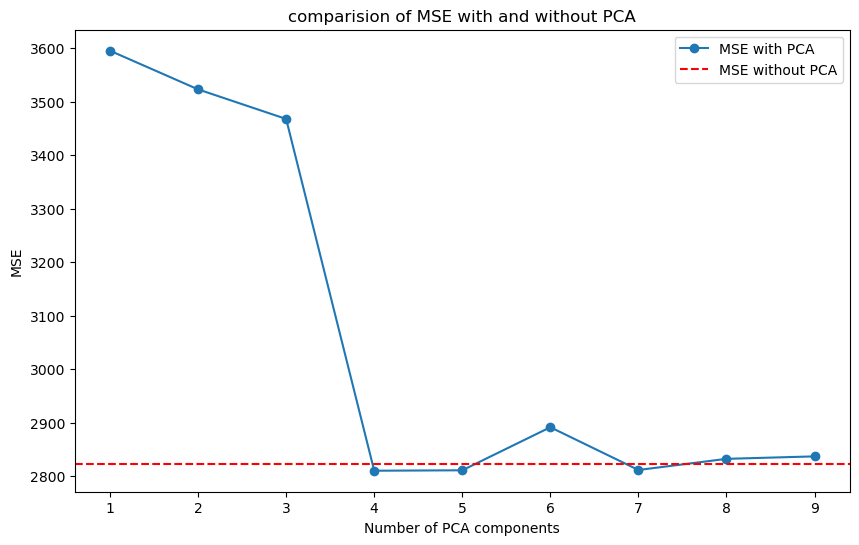

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,n_features),mse_values,marker='o',label = 'MSE with PCA')
plt.axhline(mse_full, color='r', linestyle='--', label='MSE without PCA')
plt.xlabel('Number of PCA components')
plt.ylabel('MSE')
plt.title('comparision of MSE with and without PCA')
plt.legend()
plt.show()

We use the biplot to express original components in terms of variables (only 2 first componets)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10,6))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0 /(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, color='b')

    for i in range(n):
        plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center',va='center')
        else:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center',va='center')
    plt.xlabel("Principle component 1")
    plt.ylabel("Principle component 2")
    plt.grid()



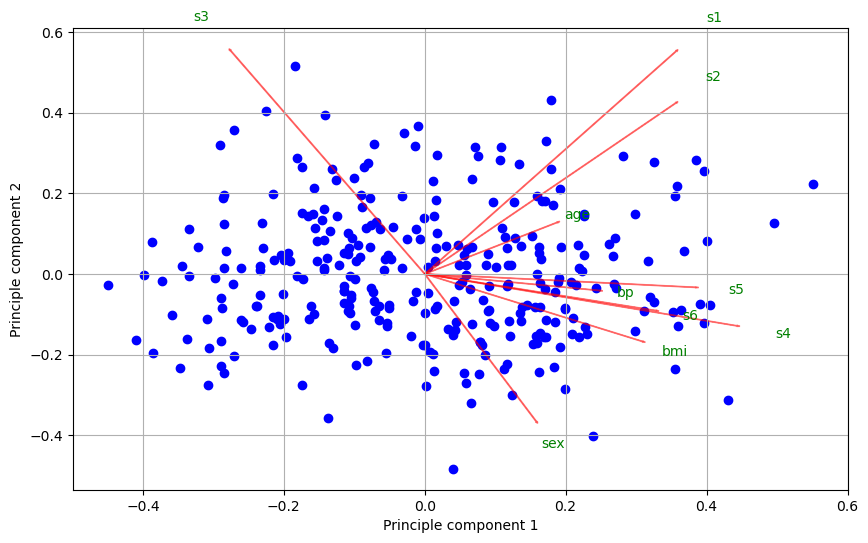

In [19]:
biplot(X_train_pca[:,:2],np.transpose(pca.components_[:2,:]), labels=diabetes.feature_names)
plt.show()